In [1]:
using_roboflow = False

In [2]:
import os
from google.colab import userdata

if using_roboflow == True:
    print("Using Roboflow")
    os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [3]:
!nvidia-smi

Thu Mar 27 08:09:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             25W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [5]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

# I change to my github repo for avoid bug if there any merch will update [Update 5/5/2025 Since they merge patch pull request - Change back to original git]

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 91.1 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.7 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.


In [6]:
from roboflow import Roboflow
!mkdir {HOME}/datasets
%cd {HOME}/datasets
rf = Roboflow(api_key="YOUR ROBOFLOW api KEY")
project = rf.workspace("gg-h5x7r").project("cat-nifqa")
version = project.version(1)
dataset = version.download("yolov12")

/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cat-1 in yolov12:: 100%|██████████| 756/756 [00:00<00:00, 2816.76it/s]


In [8]:
%cd {HOME}

# !yolo task=detect mode=train model=yolov12x.pt data={dataset.location}/data.yaml batch=6 epochs=1 imgsz=1024 plots=True
!yolo train model=yolo12x.pt data={dataset.location}/data.yaml batch=2 epochs=85 imgsz=1024 plots=True

/kaggle/working
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
New https://pypi.org/project/ultralytics/8.3.97 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo12x.pt, data=/kaggle/working/datasets/cat-1/data.yaml, epochs=85, time=None, patience=100, batch=2, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_b

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					   labels.jpg
events.out.tfevents.1743063214.b9b51fbae945.120.0  weights
labels_correlogram.jpg


/kaggle/working


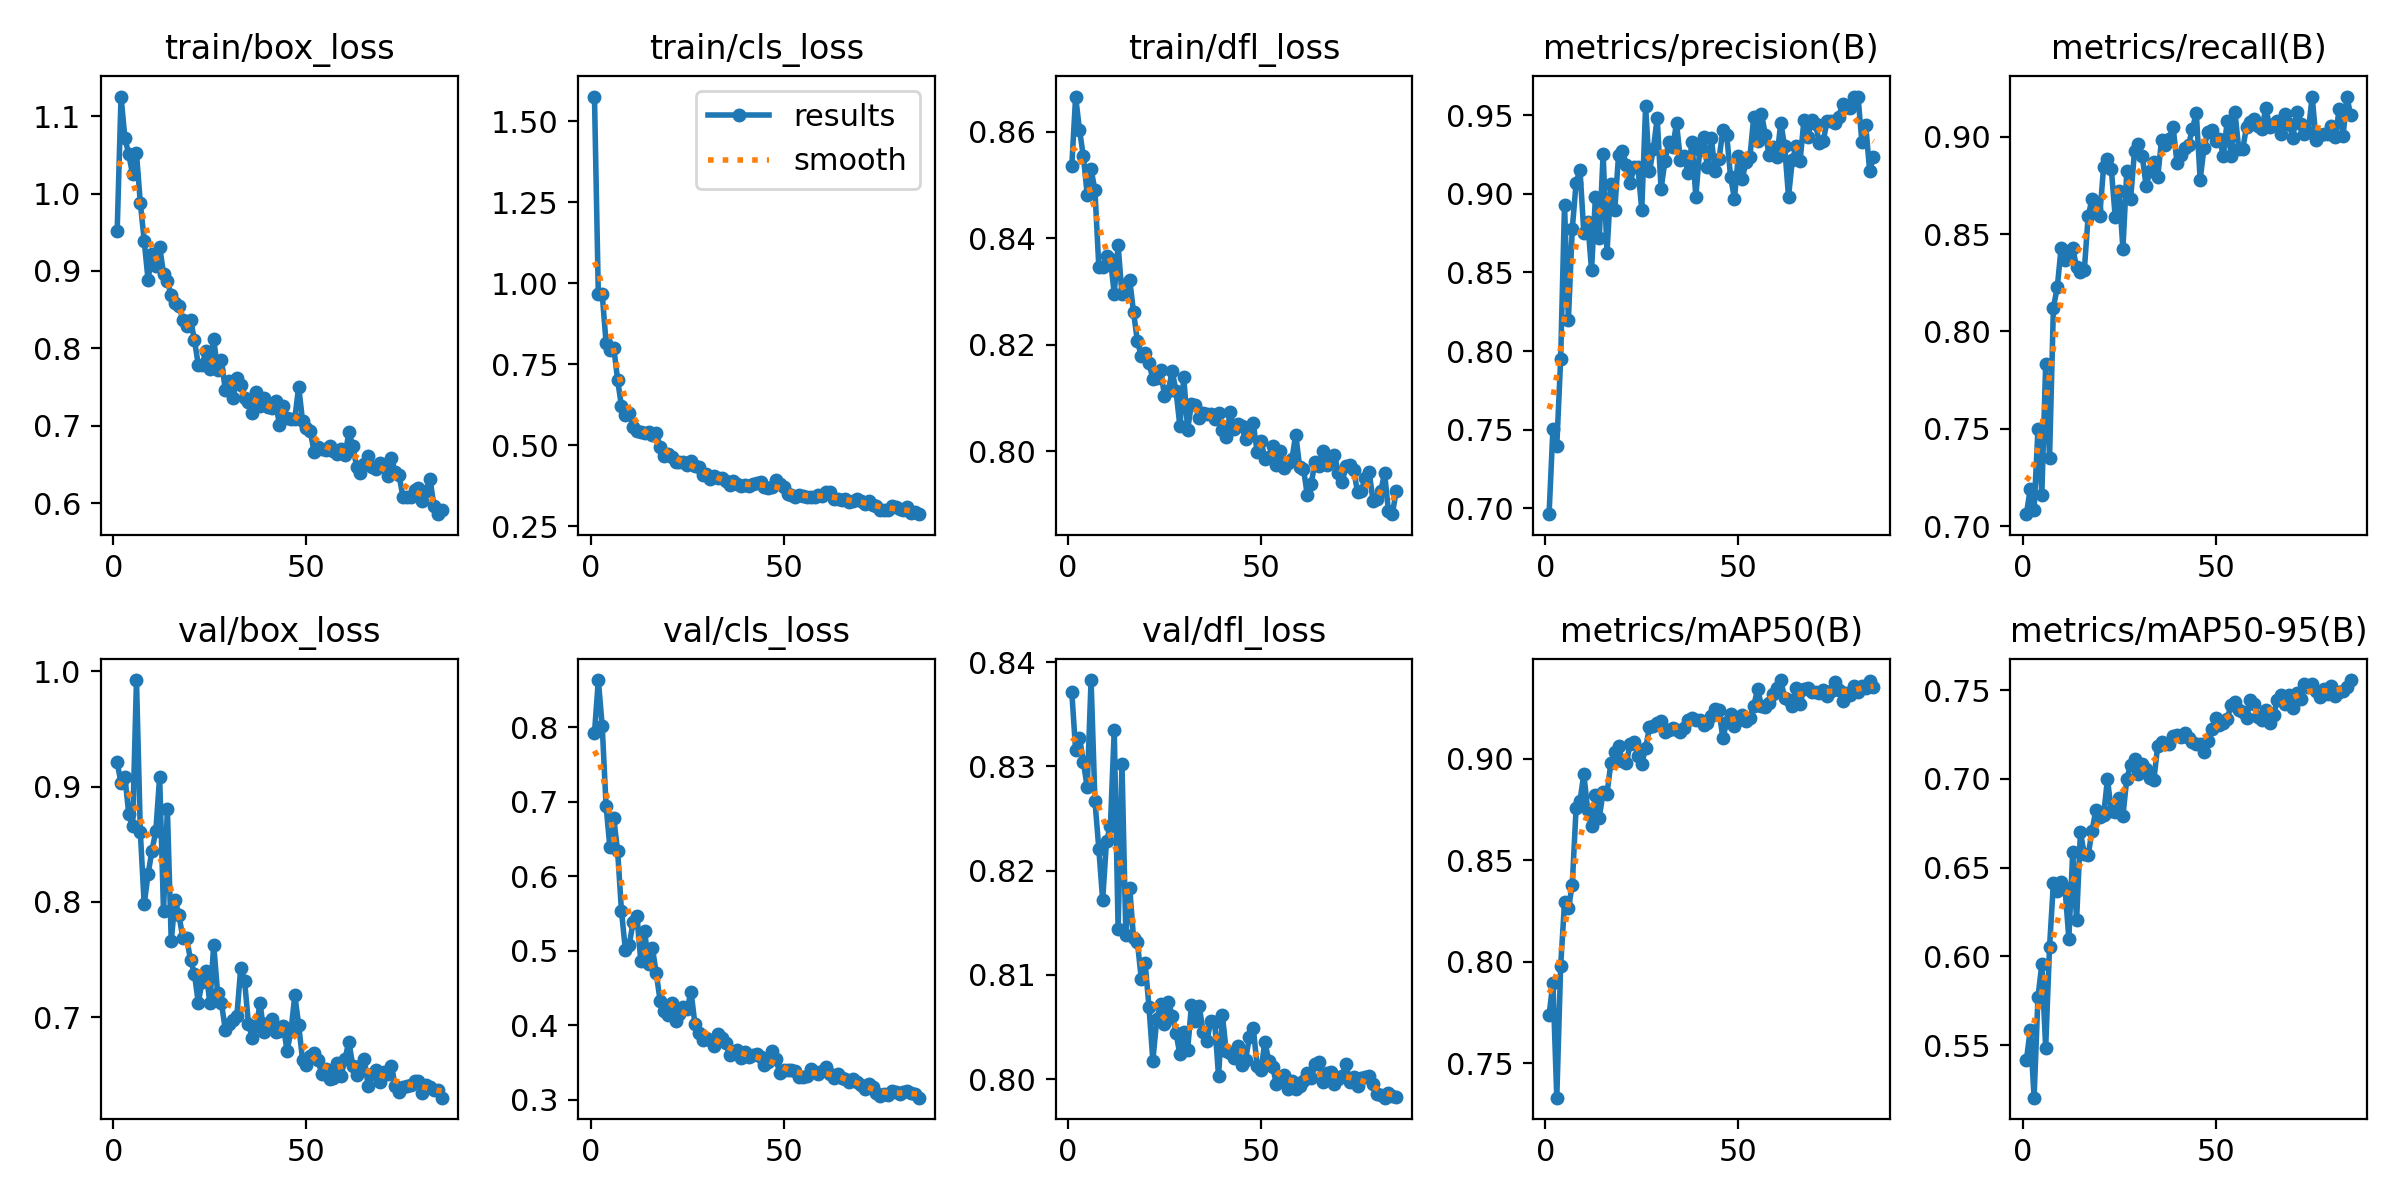

In [12]:
%cd {HOME}
from IPython.display import Image
Image(filename=f'/kaggle/working/runs/detect/train2/results.png', width=600)

/kaggle/working


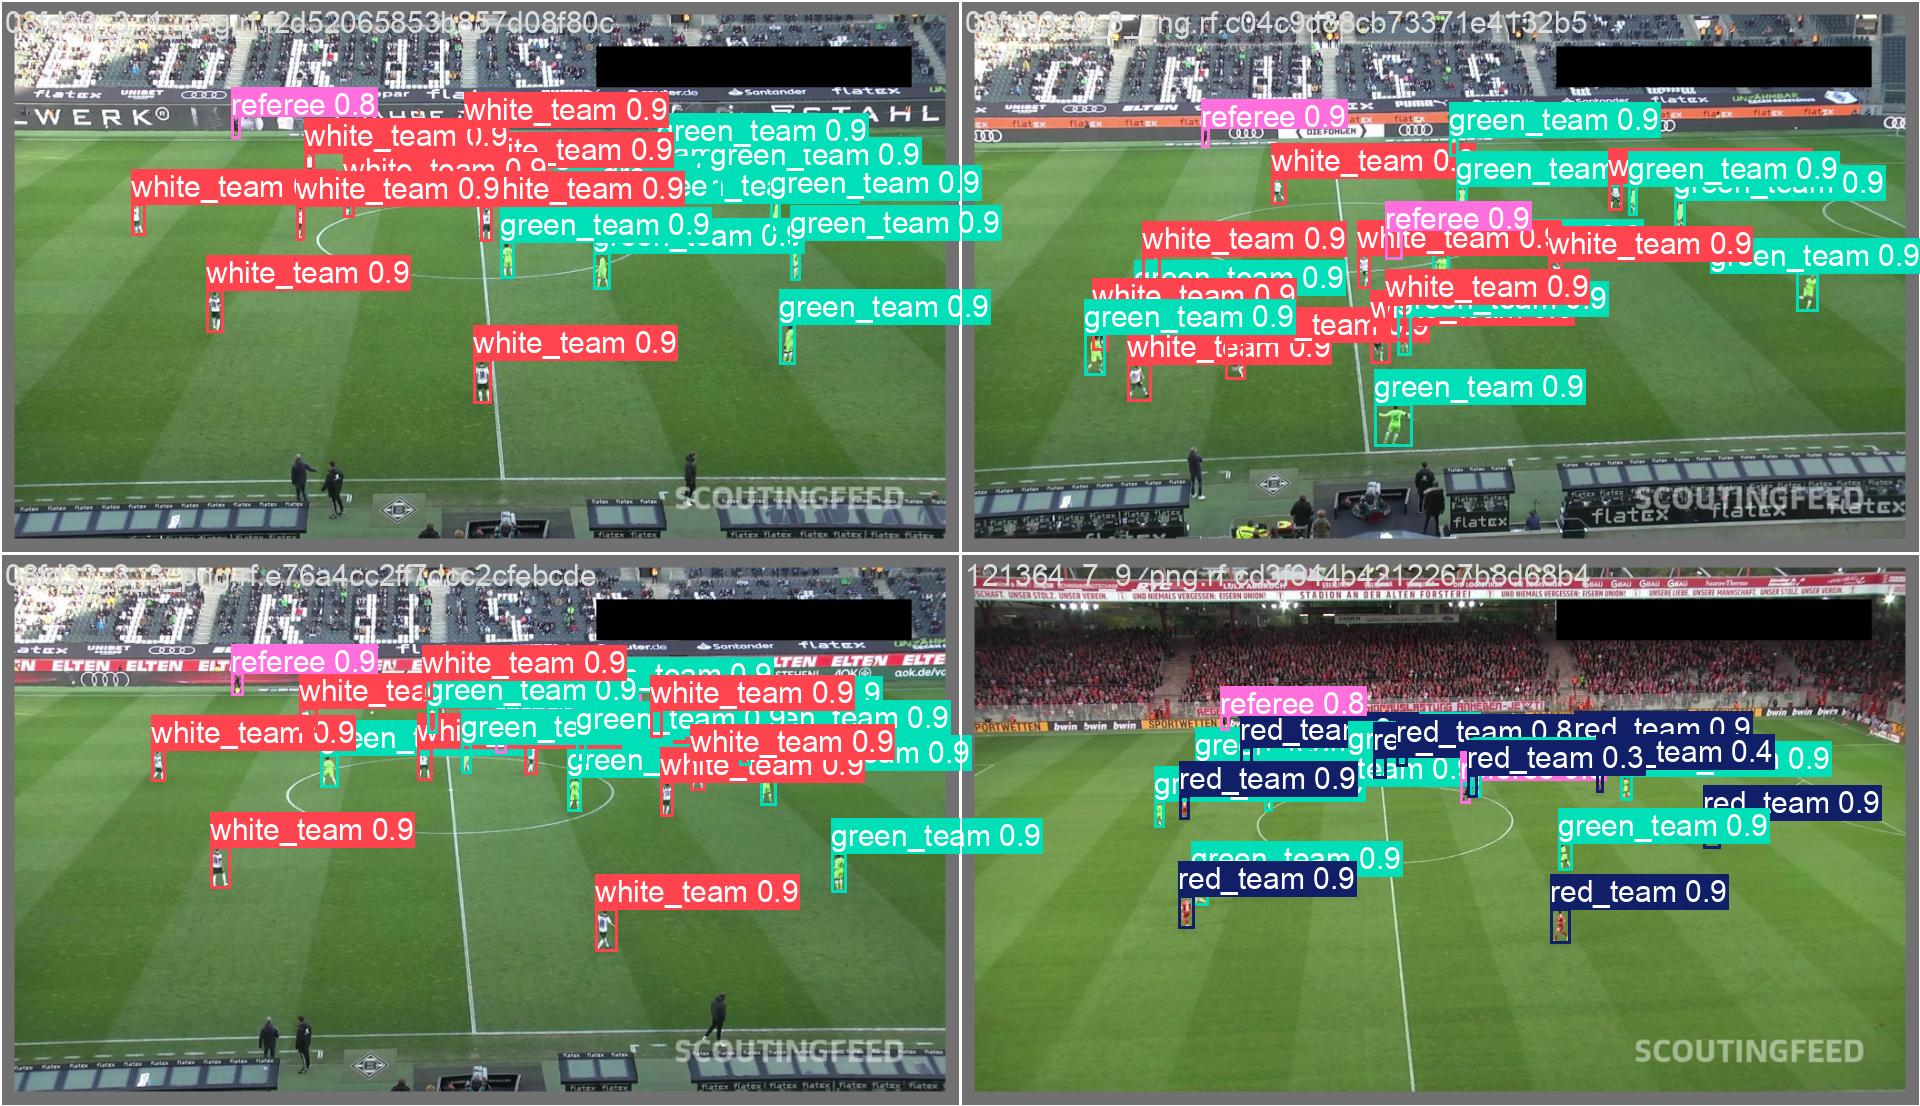

In [13]:
%cd {HOME}
Image(filename=f'/kaggle/working/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml imgsz=1280


/kaggle/working
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12x summary (fused): 674 layers, 60,332,392 parameters, 0 gradients, 201.1 GFLOPs
val: Scanning /kaggle/working/datasets/cat-1/valid/labels.cache... 49 images, 0 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         49       1171      0.951      0.927      0.944      0.777
                  ball         45         45      0.892      0.553      0.623      0.309
            black_team         21        208      0.992       0.99      0.995      0.838
            goalkeeper         39         40      0.824      0.936      0.968      0.804
            green_team          7         69      0.971      0.963      0.986      0.886
              red_team         27        269      0.988      0.993      0.995      0.867
               

In [20]:
from roboflow import Roboflow

rf = Roboflow(api_key="YOUR ROBOFLOW api KEY")
project = rf.workspace("gg-h5x7r").project("cat-nifqa")
project.version(1).deploy(model_type="yolov12",model_path="/kaggle/working/runs/detect/train2/weights")

loading Roboflow workspace...
loading Roboflow project...
Note: Model must be trained using ultralytics from https://github.com/sunsmarterjie/yolov12 or through the Roboflow platform
View the status of your deployment at: https://app.roboflow.com/gg-h5x7r/cat-nifqa/1
Share your model with the world at: https://universe.roboflow.com/gg-h5x7r/cat-nifqa/model/1
